In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Import the dataset
data = pd.read_csv('/content/drive/MyDrive/UK-HPI-full-file-2024-12.csv',index_col='Date', parse_dates=['Date'], dayfirst=True)
data.head()

,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,Aberdeenshire,S12000034,84638,41.1,NaN,NaN,NaN,NaN,388.0,130620.0,...,112843.0,40.7,NaN,NaN,103.0,81273.0,41.0,NaN,NaN,285.0
2004-02-01,Aberdeenshire,S12000034,84623,41.1,NaN,0.0,NaN,NaN,326.0,129330.0,...,113061.0,40.8,0.2,NaN,107.0,81194.0,40.9,-0.1,NaN,219.0
2004-03-01,Aberdeenshire,S12000034,86536,42.1,NaN,2.3,NaN,NaN,453.0,131585.0,...,115218.0,41.6,1.9,NaN,140.0,83137.0,41.9,2.4,NaN,313.0
2004-04-01,Aberdeenshire,S12000034,87373,42.5,NaN,1.0,NaN,NaN,571.0,130454.0,...,115247.0,41.6,0.0,NaN,180.0,84241.0,42.5,1.3,NaN,391.0
2004-05-01,Aberdeenshire,S12000034,89493,43.5,NaN,2.4,NaN,NaN,502.0,132762.0,...,117377.0,42.4,1.8,NaN,167.0,86466.0,43.6,2.6,NaN,335.0


In [3]:
# Check the columns in dataset
data.columns

Index(['RegionName', 'AreaCode', 'AveragePrice', 'Index', 'IndexSA',
       '1m%Change', '12m%Change', 'AveragePriceSA', 'SalesVolume',
       'DetachedPrice', 'DetachedIndex', 'Detached1m%Change',
       'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex',
       'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice',
       'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice',
       'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice',
       'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
       'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
       'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
       'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change',
       'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
       'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
       'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'],
      dtype='object')

In [4]:
# check the dataset statistics
data.describe()

,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
count,1.442250e+05,144225.000000,5064.000000,143772.000000,139365.000000,5064.000000,139758.000000,1.375680e+05,137568.000000,137173.000000,...,1.369360e+05,136936.000000,136540.000000,132208.000000,133959.000000,1.371400e+05,137140.000000,136744.000000,132412.000000,137130.000000
mean,1.789997e+05,58.456899,60.730865,0.540565,6.235903,164987.398697,1253.167153,3.341380e+05,58.557380,0.474132,...,2.146218e+05,60.237084,0.539280,6.414492,136.770475,1.806599e+05,58.668064,0.485427,6.188830,1137.609414
std,1.286112e+05,25.944403,24.323271,1.949590,8.717014,92657.287146,7713.117780,3.351730e+05,24.480207,1.710933,...,1.312722e+05,25.658851,1.810442,8.082565,849.346671,1.283256e+05,24.806810,1.740012,8.504063,6965.136579
min,2.553000e+03,0.800000,13.900000,-30.300000,-35.800000,39008.000000,2.000000,4.011700e+04,9.400000,-19.600000,...,2.244300e+04,8.000000,-29.800000,-28.900000,1.000000,2.271600e+04,9.000000,-30.600000,-30.300000,2.000000
25%,9.841400e+04,36.100000,44.875000,-0.400000,1.200000,113464.000000,140.000000,1.755878e+05,39.500000,-0.500000,...,1.247955e+05,40.500000,-0.500000,1.800000,10.000000,1.002445e+05,38.900000,-0.500000,1.100000,126.000000
50%,1.511560e+05,60.200000,61.400000,0.500000,5.300000,150587.500000,215.000000,2.546430e+05,59.200000,0.500000,...,1.940785e+05,60.700000,0.500000,5.500000,21.000000,1.515950e+05,60.000000,0.500000,5.300000,193.000000
75%,2.247690e+05,78.300000,78.900000,1.500000,10.300000,202901.500000,378.000000,3.855358e+05,77.700000,1.400000,...,2.707570e+05,80.400000,1.500000,10.400000,47.000000,2.250812e+05,77.500000,1.400000,10.400000,344.000000
max,1.656986e+06,153.100000,108.600000,35.300000,98.400000,574627.000000,183609.000000,5.820174e+06,147.000000,34.800000,...,1.414204e+06,149.600000,34.900000,96.200000,21097.000000,1.665089e+06,152.700000,35.600000,98.600000,166098.000000


## DATA CLEANING

In [5]:
# Check information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144225 entries, 2004-01-01 to 2024-12-01
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RegionName              144225 non-null  object 
 1   AreaCode                144225 non-null  object 
 2   AveragePrice            144225 non-null  int64  
 3   Index                   144225 non-null  float64
 4   IndexSA                 5064 non-null    float64
 5   1m%Change               143772 non-null  float64
 6   12m%Change              139365 non-null  float64
 7   AveragePriceSA          5064 non-null    float64
 8   SalesVolume             139758 non-null  float64
 9   DetachedPrice           137568 non-null  float64
 10  DetachedIndex           137568 non-null  float64
 11  Detached1m%Change       137173 non-null  float64
 12  Detached12m%Change      132852 non-null  float64
 13  SemiDetachedPrice       137568 non-null  float64
 14  Semi

In [6]:
# Check for Null values
data.isnull().sum()

,0
RegionName,0
AreaCode,0
AveragePrice,0
Index,0
IndexSA,139161
1m%Change,453
12m%Change,4860
AveragePriceSA,139161
SalesVolume,4467
DetachedPrice,6657


In [7]:
data = data.copy()

# Drop the columns only with null values
data.dropna(axis=1, inplace=True)

# Drop unimportant column Areacode
data.drop('AreaCode', axis=1, inplace=True)

In [8]:
# Show the new dataset
data.head()

,RegionName,AveragePrice,Index
Date,,,
2004-01-01,Aberdeenshire,84638,41.1
2004-02-01,Aberdeenshire,84623,41.1
2004-03-01,Aberdeenshire,86536,42.1
2004-04-01,Aberdeenshire,87373,42.5
2004-05-01,Aberdeenshire,89493,43.5


## EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
# Check the statistical property of the data
data.describe()

,AveragePrice,Index
count,1.442250e+05,144225.000000
mean,1.789997e+05,58.456899
std,1.286112e+05,25.944403
min,2.553000e+03,0.800000
25%,9.841400e+04,36.100000
50%,1.511560e+05,60.200000
75%,2.247690e+05,78.300000
max,1.656986e+06,153.100000


In [10]:
# Counting the frequency of each unique values in the column RegionName
data['RegionName'].value_counts()

,count
RegionName,
Scotland,681
East Midlands,681
England,681
Northern Ireland,681
United Kingdom,681
...,...
Mid Ulster,240
Newry Mourne and Down,240
Derry City and Strabane,240


The United Kingdom is a country in Northwestern Europe located off the coast of the continental landmass. It includes England, Scotland, Wales, and Northern Ireland

In [11]:
# Extract data from England Region
eng_data = data[data['RegionName'] == 'England']

# Extract data from Scotland Region
scot_data = data[data['RegionName'] == 'Scotland']

# Extract data from Wales Region
wales_data = data[data['RegionName'] == 'Wales']

# Extract data from Northern Ireland Region
north_data = data[data['RegionName'] == 'Northern Ireland']

# Extract data from the United Kingdom region
uk_data = data[data['RegionName'] == 'United Kingdom']

# filter the dataset to display region called London alone
london_data = data[data['RegionName'] == 'London']

## DATA VISUALIZATION

Display the histogram plot and the lineplots of the region extracted.

In [12]:
# put the new dataset into a list and create a label
data_list = [wales_data, scot_data, north_data, eng_data]
labels = ['Wales', 'Scotland', 'Northern Ireland', 'England']

def plot_hist(data_list, labels):
    """
    Create histograms for each dataset in the list and display as subplots
    """
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
    axes = axes.flatten()

    # Enumerate, zip the dataset from list and create 2x2 subplots
    for ax, data, label in zip(axes, data_list, labels):
        sns.histplot(data['AveragePrice'], label=label, bins=20, alpha=0.5, kde=True, ax=ax)
        ax.set_xlabel('Average Price')
        ax.set_title(label)
        ax.set_xlabel('Average Price')
        ax.set_ylabel('Frequency')
        ax.legend()

    plt.tight_layout()

    # display the function
    plt.show()
    return

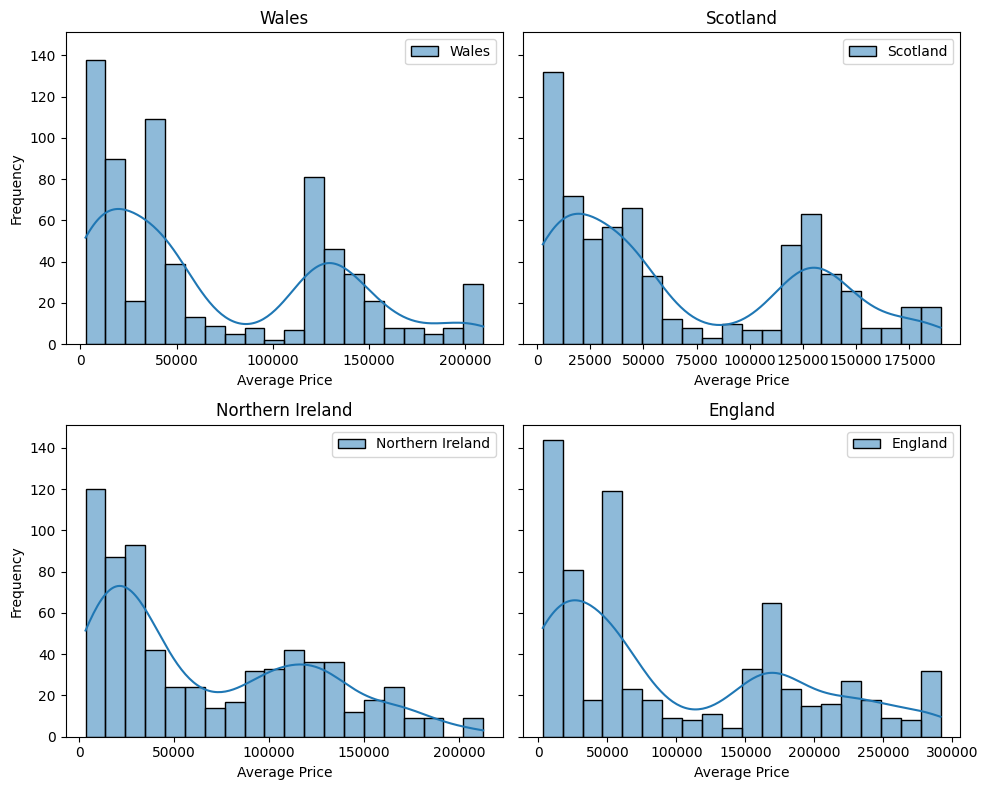

In [13]:
# Display the function
plot_hist(data_list, labels)

In [14]:
def plot_line(data_list, labels):
    """
    Create line plots for each dataset in the list and display as subplots
    """
    plt.figure(figsize=(12, 8))

    # Enumerate, zip the dataset from list and create
    for i, (data, label) in enumerate(zip(data_list, labels), 1):
        plt.subplot(2, 2, i)
        sns.lineplot(x=data.index, y='AveragePrice', data=data, label=label)
        plt.title(label)
        plt.xlabel('Date')
        plt.ylabel('Average Price')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()

    # display the function
    plt.show()
    # save the plot
    #plt.savefig('line_plot.png')
    return

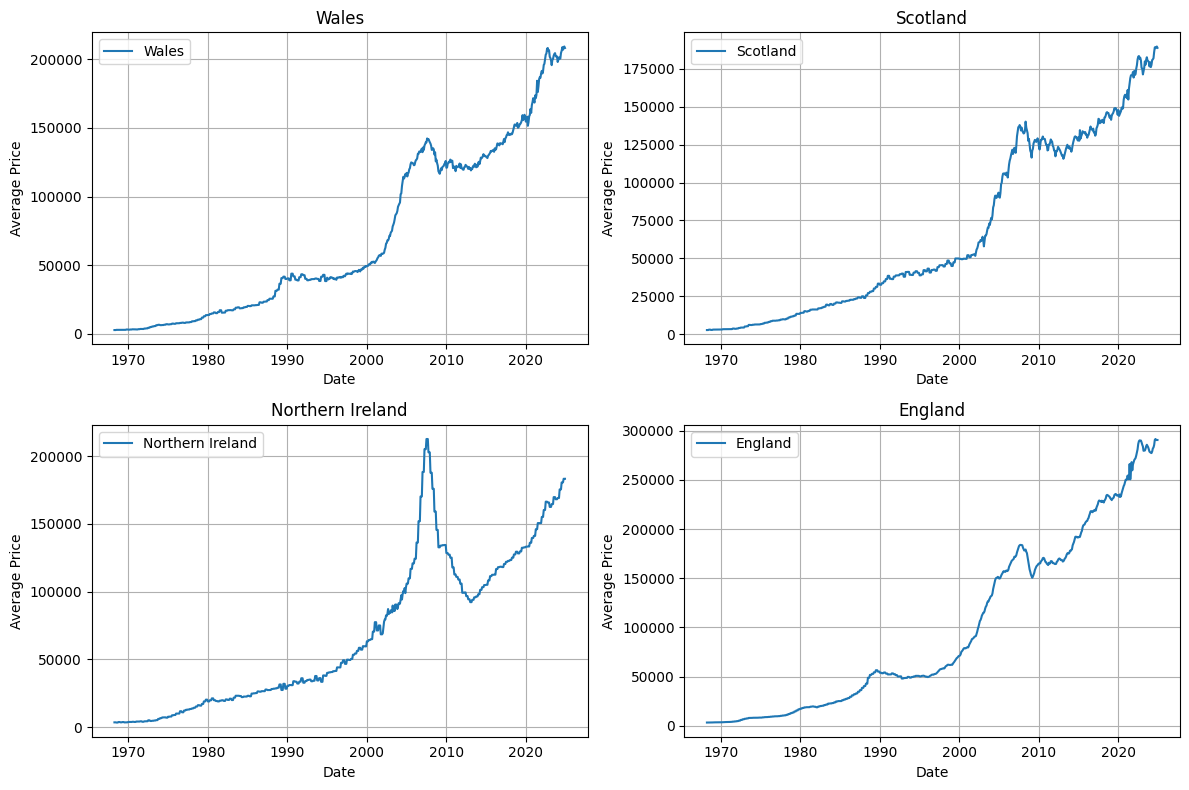

In [15]:
plot_line(data_list, labels)

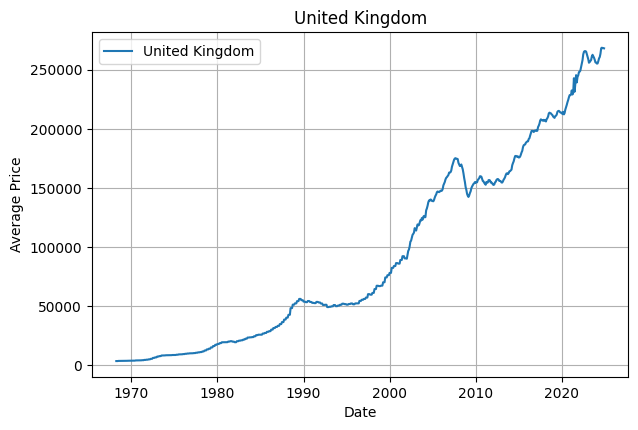

In [16]:
# show the lineplot of the data based on the region United Kingdom
plot_line([uk_data], ['United Kingdom'])

In [17]:
uk_data = uk_data.copy()

# extract data from 1990
uk_data = uk_data[uk_data.index >= '1990-01-01']

#drop regionName and average price
uk_data= uk_data.drop(['RegionName', 'Index'], axis=1)

In [18]:
# Check for duplicates
uk_data.duplicated().sum()

np.int64(96)

In [19]:
# View duplicate rows
duplicates = uk_data[uk_data.duplicated()]
print(duplicates)

            AveragePrice
Date                    
1990-02-01         53658
1990-03-01         53658
1990-05-01         53176
1990-06-01         53176
1990-08-01         54141
...                  ...
2001-06-01         88892
2001-08-01         92090
2001-09-01         92090
2001-11-01         90242
2001-12-01         90242

[96 rows x 1 columns]


The duplicates only indicate that there are some months in which the Average Price did not change

In [20]:
# frequency of the time series to monthly, starting at the beginning of each month
uk_data= uk_data.asfreq('MS')
uk_data.head()

,AveragePrice
Date,
1990-01-01,53658
1990-02-01,53658
1990-03-01,53658
1990-04-01,53176
1990-05-01,53176


## TIME SERIES ANALYSIS USING ARIMA AND SARIMA

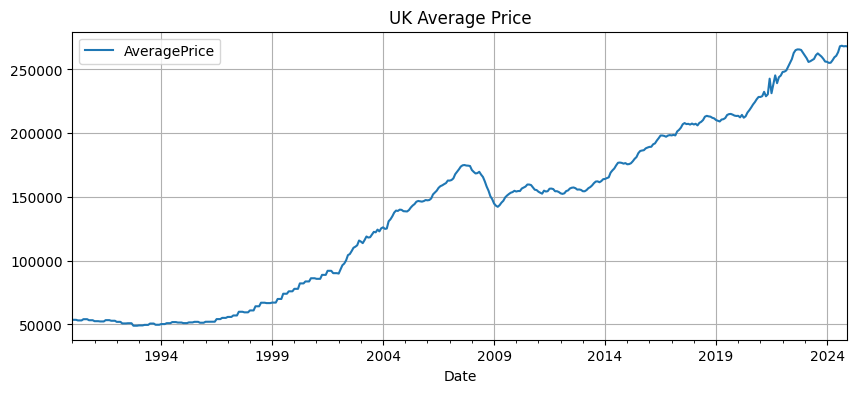

In [21]:
# Display the plot
uk_data.plot(figsize=(10,4), legend=True, grid=True, title='UK Average Price')
plt.show()

## SEASONAL DECOMPOSITION

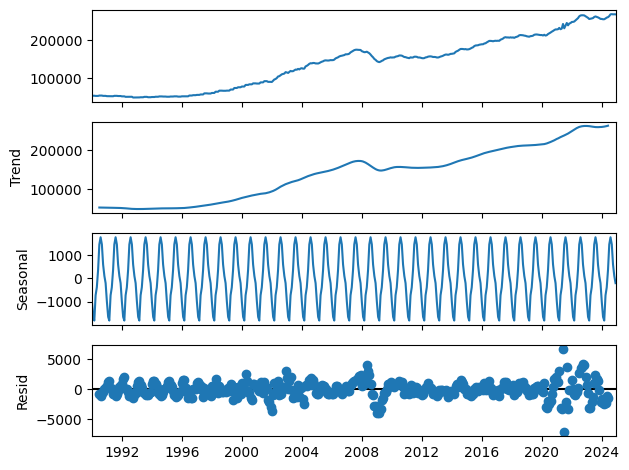

In [22]:
# Component of time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(uk_data, model='additive')
decomposition.plot()
plt.show()

# TEST FOR STATIONARITY
1. Rolling Statistics - Visual Technique
2. Augumented Dickey- Fuller Test

## ROLLING STATISTICS

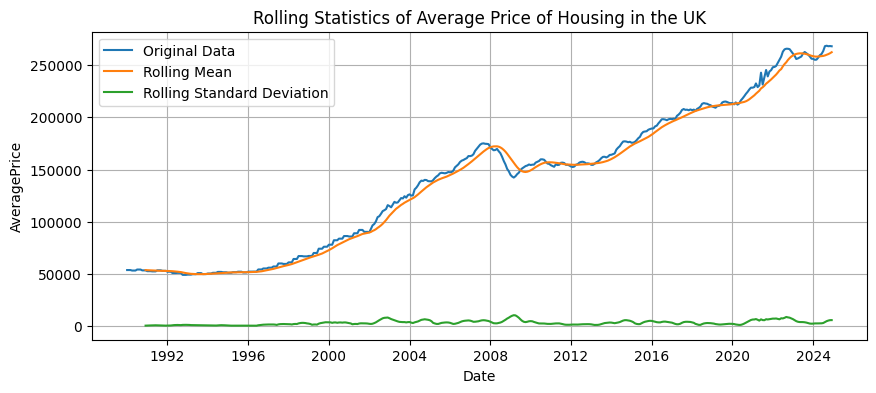

In [23]:
# determing the rolling statistics
rolling_mean = uk_data['AveragePrice'].rolling(window=12).mean()
rolling_std = uk_data['AveragePrice'].rolling(window=12).std()

# plot the rolling statistics
plt.figure(figsize=(10, 4))
plt.plot(uk_data['AveragePrice'], label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Standard Deviation')
plt.title('Rolling Statistics of Average Price of Housing in the UK')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.legend()
plt.grid(True)
plt.show()

## Augumented Dickey- Fuller Test

In [24]:
# Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# Create a Stationarity Check function
def test_stationarity(timeseries):
    """
    Perform Dickey-Fuller test
    """
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [25]:
# Check for Stationarity on the data
test_stationarity(uk_data['AveragePrice'])

Results of Dickey-Fuller Test:
Test Statistic                   0.985395
p-value                          0.994109
#Lags Used                      16.000000
Number of Observations Used    403.000000
Critical Value (1%)             -3.446681
Critical Value (5%)             -2.868739
Critical Value (10%)            -2.570605
dtype: float64


For a dataset to be stationary, several methods can be employed to implement the process. One of which is calculating the Moving Average and subtracting it from the Dataset(differencing).

Results of Dickey-Fuller Test:
Test Statistic                  -2.991024
p-value                          0.035741
#Lags Used                      16.000000
Number of Observations Used    392.000000
Critical Value (1%)             -3.447142
Critical Value (5%)             -2.868941
Critical Value (10%)            -2.570713
dtype: float64


<Axes: xlabel='Date'>

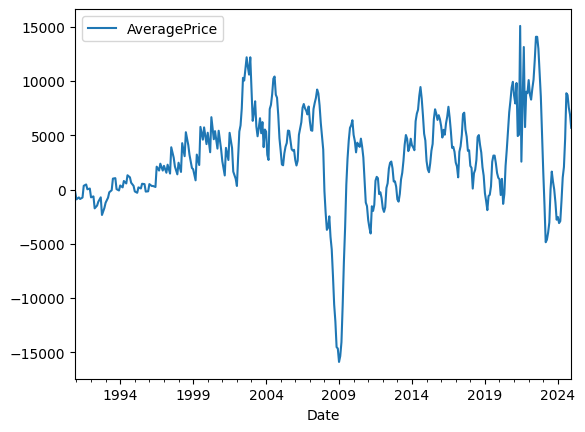

In [26]:
# Moving average
moving_AVG = uk_data.rolling(window=12).mean()

# Tranformation to make the data stationary
data_moving_diff = uk_data - moving_AVG

# Drop the null values
data_moving_diff.dropna(inplace=True)

# perform the stationarity test again
test_stationarity(data_moving_diff)
data_moving_diff.plot()

## FIRST ORDER DIFFERENCING
Another Method of making the Dataset stationary is by perfroming First order Differencing

Results of Dickey-Fuller Test:
Test Statistic                  -5.574449
p-value                          0.000001
#Lags Used                      15.000000
Number of Observations Used    403.000000
Critical Value (1%)             -3.446681
Critical Value (5%)             -2.868739
Critical Value (10%)            -2.570605
dtype: float64


<Axes: xlabel='Date'>

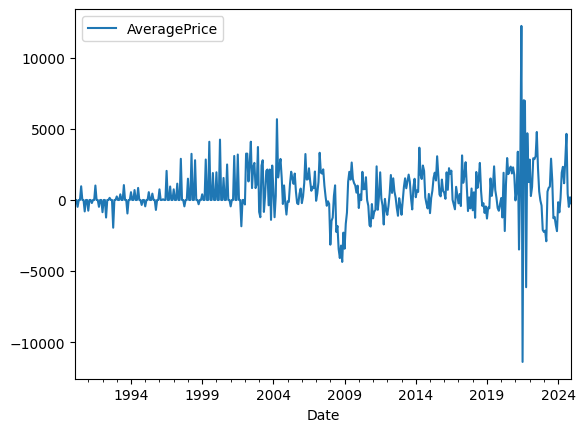

In [27]:
uk_data = uk_data.copy()
# Perform first-order differencing
data_diff = uk_data.diff()

# Drop the first row which will be NaN after differencing
data_diff.dropna(inplace=True)

# Perform the stationarity test on the differenced data
test_stationarity(data_diff)

# display the graph
data_diff.plot()

Results of Dickey-Fuller Test:
Test Statistic                -7.205834e+00
p-value                        2.301611e-10
#Lags Used                     1.400000e+01
Number of Observations Used    3.930000e+02
Critical Value (1%)           -3.447099e+00
Critical Value (5%)           -2.868923e+00
Critical Value (10%)          -2.570703e+00
dtype: float64


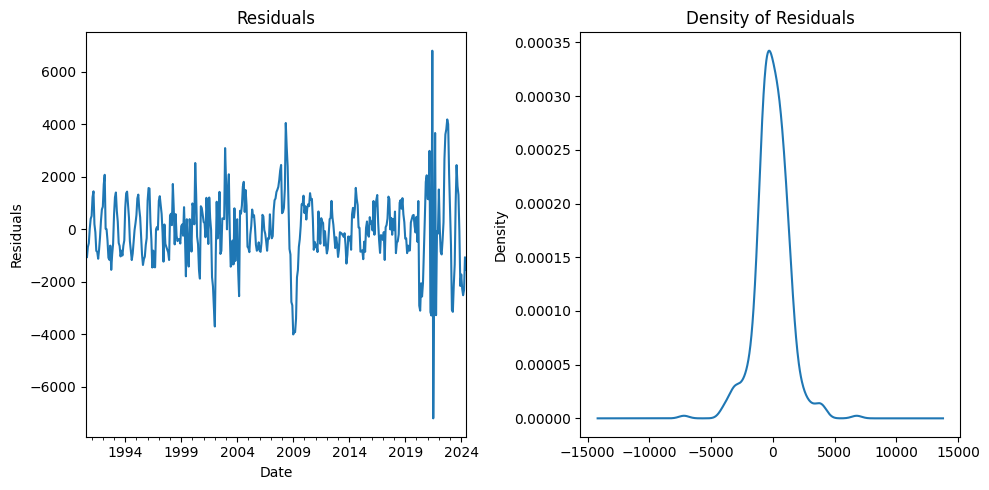

In [28]:
# check if the noise is stationary
noise = decomposition.resid
noise.dropna(inplace=True)

# Perform the Stationary test
test_stationarity(noise)

# display the noise plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
noise.plot(title='Residuals', ax=ax[0])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Residuals')
noise.plot(kind='kde', title='Density of Residuals', ax=ax[1])
plt.tight_layout()
plt.show()

# ACF AND PACF GRAPH

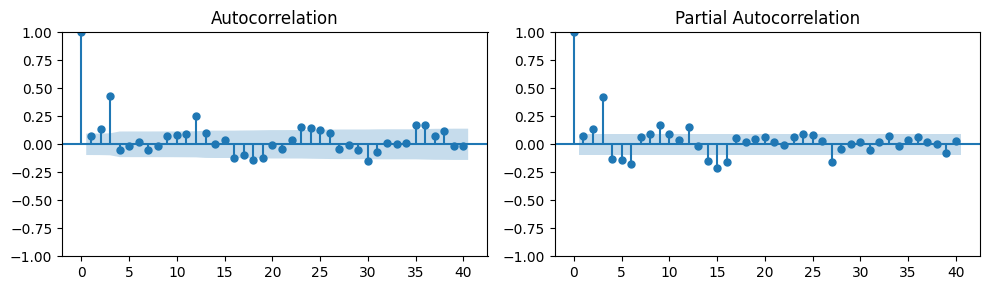

In [29]:
# calculate the ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=False)

# Plot ACF
plot_acf(data_diff, lags=40, ax=ax[0])

# Plot PACF
plot_pacf(data_diff, lags=40, ax=ax[1])

plt.tight_layout()
plt.show()

To make a Prediction on the data, the dataset must be split into a training and a Test Dataset.

In [30]:
# split the dataset into train and test dataset
train_size = int(len(uk_data) * 0.8)
train_data, test_data = uk_data[:train_size], uk_data[train_size:]

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Implement the Arima Model
model = ARIMA(train_data['AveragePrice'], order=(0, 1, 3))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  336
Model:                 ARIMA(0, 1, 3)   Log Likelihood               -2878.198
Date:                Wed, 20 Aug 2025   AIC                           5764.395
Time:                        14:36:54   BIC                           5779.652
Sample:                    01-01-1990   HQIC                          5770.478
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1163      0.011     10.760      0.000       0.095       0.137
ma.L2          0.0851      0.017      4.874      0.000       0.051       0.119
ma.L3          0.1294      0.013     10.286      0.0

In [32]:
# Implement ARIMA predict
pred = results.predict(start=test_data.index[0], end=test_data.index[-1])
pred.head()

,predicted_mean
2018-01-01,207642.668732
2018-02-01,207658.390215
2018-03-01,207790.929163
2018-04-01,207790.929163
2018-05-01,207790.929163


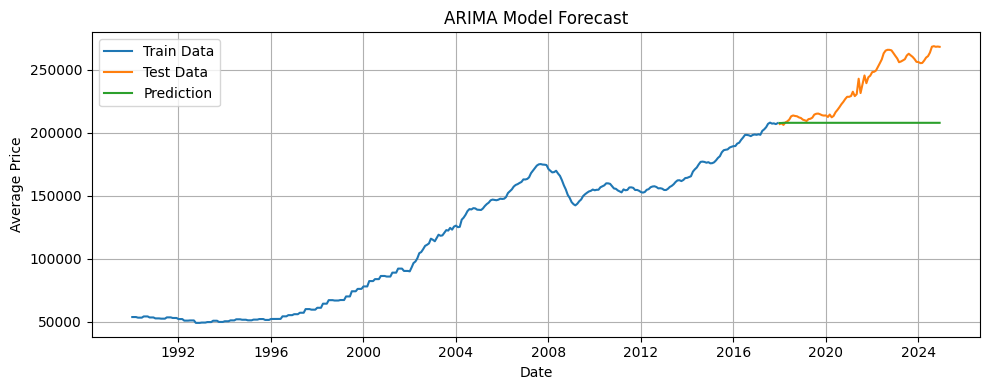

In [33]:
# Plot the graph for the Arimal Model
plt.figure(figsize=(10, 4))
plt.plot(train_data['AveragePrice'], label='Train Data',)
plt.plot(test_data['AveragePrice'], label='Test Data')
plt.plot(pred, label='Prediction')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

## MODEL EVALUATION
To see how well the ARIMA model performs in the Dataset

In [34]:
# Evaluate the model
mse = mean_squared_error(test_data['AveragePrice'], pred)
mae = mean_absolute_error(test_data['AveragePrice'], pred)
r2 = r2_score(test_data['AveragePrice'], pred)

# Calculate the variance of the 'AveragePrice' column in the test data
test_data_var = test_data['AveragePrice'].var()

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)
print(f'Variance of Test Data (AveragePrice): {test_data_var:.2f}')
print('RMSE: ',np.sqrt(mean_squared_error(test_data['AveragePrice'], pred)))

Mean Squared Error: 1324183518.2126298
Mean Absolute Error: 29021.937212799137
R-squared: -1.7253470354587002
Variance of Test Data (AveragePrice): 491730968.23
RMSE:  36389.33247825013


# SARIMA
Seasonal Auto regressive Integrated and Moving Average

## Implementation of the SARIMA model

In [35]:
# Implement the SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data['AveragePrice'], order=(0, 1, 3), seasonal_order=(0, 1, 1, 12))
results_1 = model.fit()

print(results_1.summary())

                                      SARIMAX Results                                       
Dep. Variable:                         AveragePrice   No. Observations:                  336
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -2764.404
Date:                              Wed, 20 Aug 2025   AIC                           5538.808
Time:                                      14:37:46   BIC                           5557.696
Sample:                                  01-01-1990   HQIC                          5546.348
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1109      0.017      6.552      0.000       0.078       0.144
ma.L2          0.10

In [36]:
# Make the prediction
pred_1 = results_1.predict(start=test_data.index[0], end=test_data.index[-1])
pred_1.head()

,predicted_mean
2018-01-01,207447.322915
2018-02-01,207568.300730
2018-03-01,207852.238703
2018-04-01,210369.233752
2018-05-01,211849.957353


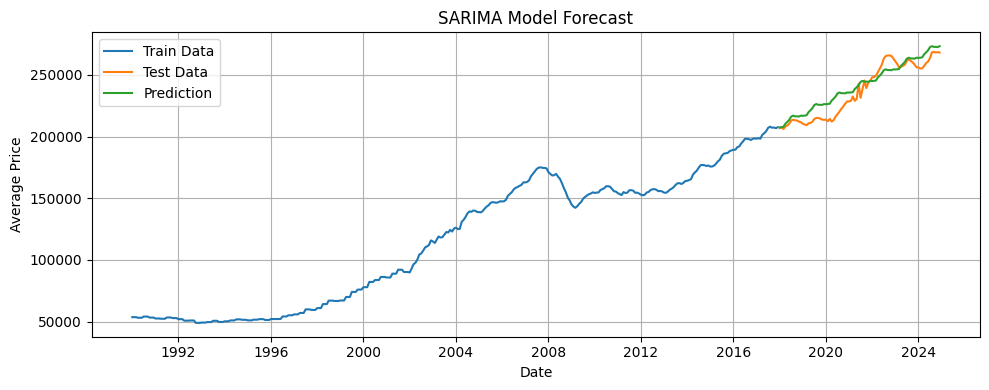

In [37]:
# Diplay the plot of train,test and prediction
plt.figure(figsize=(10, 4))
plt.plot(train_data['AveragePrice'], label='Train Data')
plt.plot(test_data['AveragePrice'], label='Test Data')
plt.plot(pred_1, label='Prediction')
plt.title('SARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

## MODEL EVALUATION
To see how well the SARIMA model performs on the Dataset.

In [38]:
# Evaluate the model
mse_1 = mean_squared_error(test_data['AveragePrice'], pred_1)
mae_1 = mean_absolute_error(test_data['AveragePrice'], pred_1)
r2_1 = r2_score(test_data['AveragePrice'], pred_1)

# Calculate the variance of the 'AveragePrice' column in the test data
test_data_var = test_data['AveragePrice'].var()

print('Mean Squared Error:', mse_1)
print('Mean Absolute Error:', mae_1)
print('R-squared:', r2_1)
print(f'Variance of Test Data (AveragePrice): {test_data_var:.2f}')
print('RMSE: ',np.sqrt(mean_squared_error(test_data['AveragePrice'], pred_1)))

Mean Squared Error: 69243945.00141151
Mean Absolute Error: 7031.682099172676
R-squared: 0.8574866869753928
Variance of Test Data (AveragePrice): 491730968.23
RMSE:  8321.294670987892


## TIME FORECASTING

In [39]:
# Make a forecast for the new two years
future_dates = pd.DataFrame(pd.date_range(start='2025-01-01', end='2027-12-01', freq='MS'), columns=['Future Dates'])
future_dates.set_index('Future Dates', inplace=True)
future_dates.head()

""
Future Dates
2025-01-01
2025-02-01
2025-03-01
2025-04-01
2025-05-01


In [40]:
# Predict the future dates
future_prediction = results_1.predict(start=future_dates.index[0], end=future_dates.index[-1])
future_prediction.tail()

,predicted_mean
2027-08-01,301370.268928
2027-09-01,300794.851506
2027-10-01,300786.235176
2027-11-01,300661.633497
2027-12-01,301356.059759


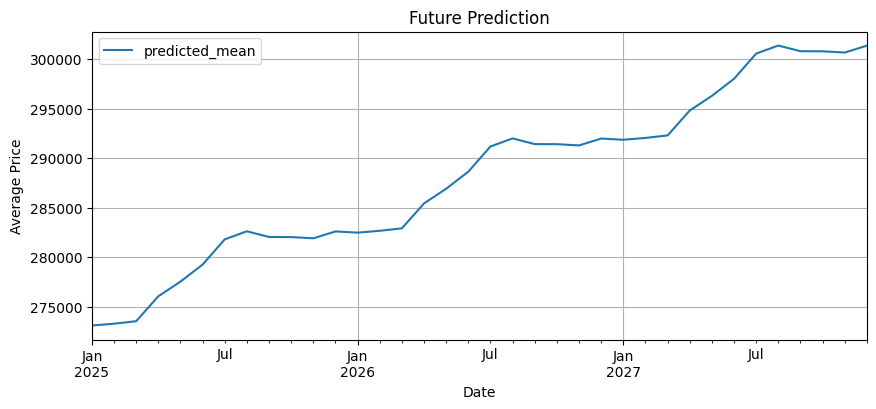

In [41]:
# Display the graph For the Future Forcast
future_prediction.plot(title='Future Prediction', figsize=(10, 4), grid= True, legend=True)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

In [42]:
forecast_future_values = results_1.get_forecast(steps=len(future_dates))
forecast_future_mean = forecast_future_values.predicted_mean
forecast_future_mean.head()

,predicted_mean
2018-01-01,207447.322915
2018-02-01,207568.300730
2018-03-01,207852.238703
2018-04-01,210369.233752
2018-05-01,211849.957353


## Refit SARIMA on the full dataset

In [43]:
# Implement the Sarimax on the entire dataset for forcasting
model_1 = SARIMAX(uk_data['AveragePrice'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
results_2 = model_1.fit()

print(results_2.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       AveragePrice   No. Observations:                  420
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -3671.409
Date:                            Wed, 20 Aug 2025   AIC                           7348.818
Time:                                    14:38:37   BIC                           7360.845
Sample:                                01-01-1990   HQIC                          7353.578
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0314      0.028     -1.120      0.263      -0.086       0.024
ar.S.L12      -0.2185      0.010   

In [44]:
# Set the forecast horizon to 2 years (24 months)
forecast_horizon = 24

# Forecast the next 24 months from the model
forecast_future_values = results_2.get_forecast(steps=forecast_horizon)

# Extract the forecast future values
forecast_future_mean = forecast_future_values.predicted_mean
forecast_future_mean.head()

,predicted_mean
2025-01-01,267412.680959
2025-02-01,266265.871312
2025-03-01,265733.982518
2025-04-01,267367.423510
2025-05-01,269376.655584


In [45]:
# Extract the confidence interval
confidence_intervals = forecast_future_values.conf_int()

# Display the confidence interval
confidence_intervals.head()

,lower AveragePrice,upper AveragePrice
2025-01-01,263293.280916,271532.081002
2025-02-01,260531.021737,272000.720887
2025-03-01,258745.416047,272722.548988
2025-04-01,259318.162678,275416.684342
2025-05-01,260391.046493,278362.264675


In [46]:
# Create future_dates as a DatetimeIndex
future_dates = pd.date_range(start=uk_data.index[-1] + pd.DateOffset(months=1), periods=forecast_horizon, freq='MS')

# Assign the Created Future date to the index of forecast future value and the confidence interval
forecast_future_mean.index = future_dates
confidence_intervals.index = future_dates

# Display the forecast future mean and confidence interval
print("Forecast Future Mean:")
display(forecast_future_mean.head())
print("\nConfidence Intervals:")
display(confidence_intervals.head())

Forecast Future Mean:


,predicted_mean
2025-01-01,267412.680959
2025-02-01,266265.871312
2025-03-01,265733.982518
2025-04-01,267367.423510
2025-05-01,269376.655584



Confidence Intervals:


,lower AveragePrice,upper AveragePrice
2025-01-01,263293.280916,271532.081002
2025-02-01,260531.021737,272000.720887
2025-03-01,258745.416047,272722.548988
2025-04-01,259318.162678,275416.684342
2025-05-01,260391.046493,278362.264675


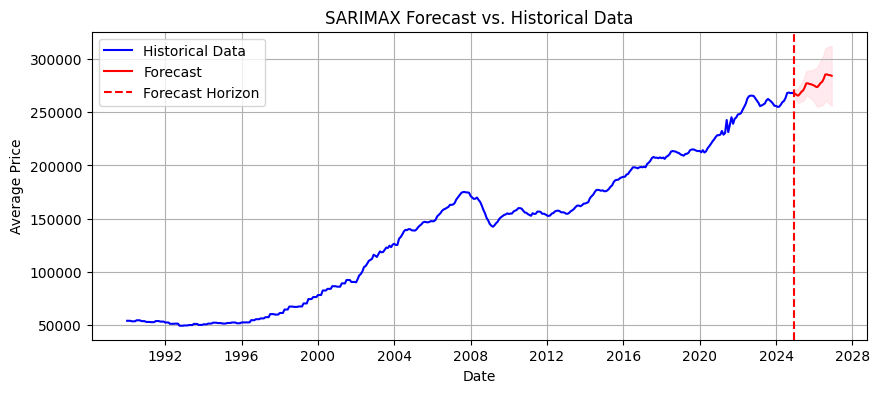

In [47]:
# Display the plot
plt.figure(figsize=(10, 4))
plt.plot(uk_data['AveragePrice'], label='Historical Data', color='blue')
plt.plot(forecast_future_mean, label='Forecast', color='red')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.axvline(x=uk_data.index[-1], color='red', linestyle='--', label='Forecast Horizon')
plt.title('SARIMAX Forecast vs. Historical Data')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()


# DEEP LEARNING-LSTM
Long Short Term Memory is a type of RNN desigh to handle sequences of data especially when Long term dependencies are important.

Implentation of LSTM on the Average price of Houses in the United Kingdom.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam

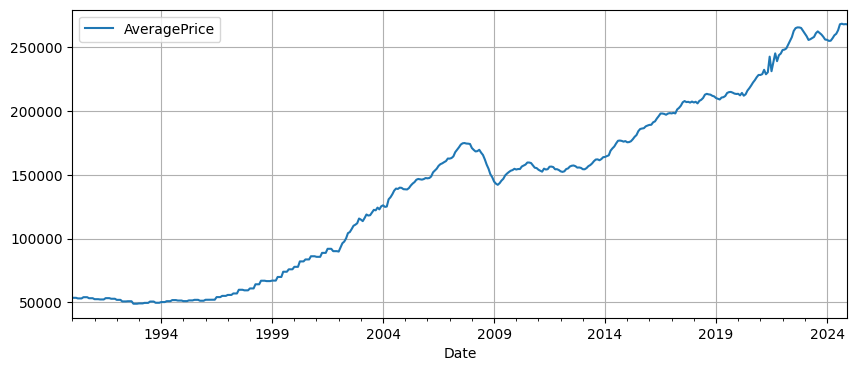

In [ ]:
# Display the plot
uk_data.plot(figsize=(10,4), legend=True, grid=True)
plt.show()

In [ ]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(uk_data['AveragePrice'].values.reshape(-1,1))

## PREPARATION OF TIME SERIES FOR THE LSTM MODEL

In [ ]:
def data_time_series(data, length):
    X = []
    y = []
    for i in range(length, len(data)):
        X.append(data[i-length:i, 0])
        y.append(data[i, 0])

    # train and test split
    size = int(len(X) * 0.8)
    X_train, X_test = np.array(X[:size]), np.array(X[size:])
    y_train, y_test = np.array(y[:size]), np.array(y[size:])

    # reshape the input for the LSTM
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, X_test, y_train, y_test

In [ ]:
# input the data window into the sequences
length = 12
X_train, X_test, y_train, y_test = data_time_series(scaled_data, length)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(326, 12, 1) (82, 12, 1) (326,) (82,)


## BUILD THE LSTM MODEL

In [ ]:
# Build time series model
model = Sequential()

# First layer
model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=((X_train.shape[1], X_train.shape[2]))))

# Second layer
model.add(LSTM(64, activation='relu'))

# Third layer - Dense layer
model.add(Dense(32, activation='relu'))

# Fourth layer - Dropout layer
model.add(Dropout(0.1))

# Final layer
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,033 (203.25 KB)

 Trainable params: 52,033 (203.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# implement earlystopping to avoid overfitting
earlystopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    restore_best_weights=True
)

In [ ]:
# compile the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
# manually split the data set fot validation
val_size = int(len(X_train) * 0.1)
X_val = X_train[-val_size:]
y_val = y_train[-val_size:]

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0479 - root_mean_squared_error: 0.1817 - val_loss: 0.2067 - val_root_mean_squared_error: 0.4546
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0129 - root_mean_squared_error: 0.1126 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0440
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0494 - root_mean_squared_error: 0.2198 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1079
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0202 - root_mean_squared_error: 0.1407 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0104 - root_mean_squared_error: 0.1010 - val_loss: 6.5383e-04 - val_root_mean_squared_error: 0.0256
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - l

In [ ]:
# Predict
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step


## MODEL EVALUATION

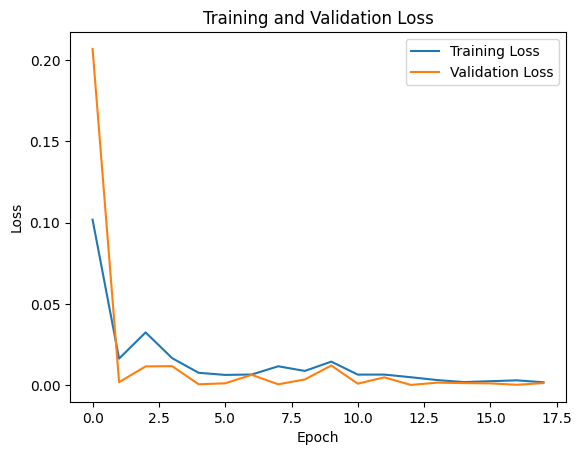

In [ ]:
# Model evaluation USING Training and Validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

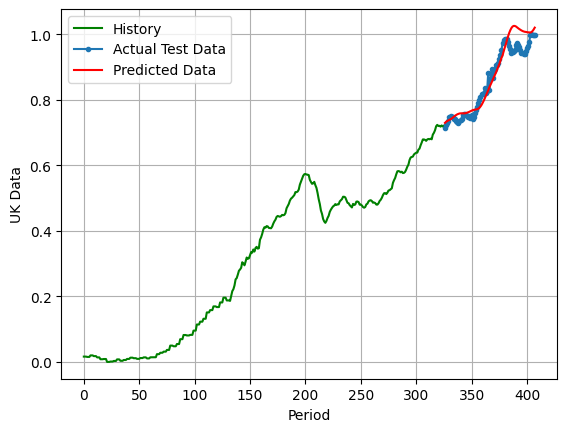

In [ ]:
# display the prediction
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label='History')
plt.plot(np.arange(len(y_train), len(y_train)+len(y_test)), y_test, marker= '.', label='Actual Test Data')
plt.plot(np.arange(len(y_train), len(y_train)+len(y_test)), y_pred, 'r', label='Predicted Data')
plt.ylabel('UK Data')
plt.xlabel('Period')
plt.legend()
plt.grid()
plt.show()

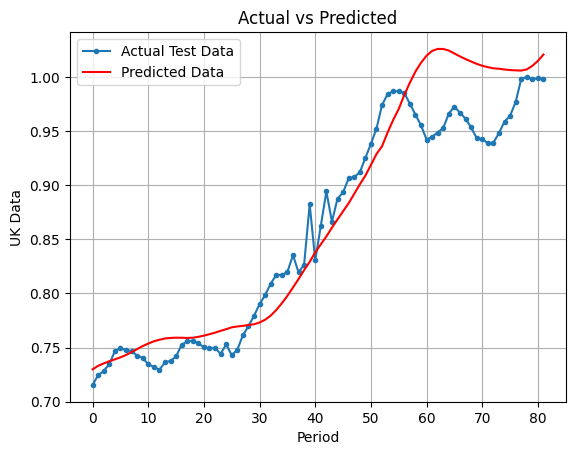

In [ ]:
# Display the prediction with test Data
plt.plot(y_test, marker= '.', label='Actual Test Data')
plt.plot(y_pred, 'r', label='Predicted Data')
plt.title('Actual vs Predicted')
plt.ylabel('UK Data')
plt.xlabel('Period')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# rescaled back to the orginal scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-Squared Score of LSTM model",r2)

R-Squared Score of LSTM model 0.8827149368201176


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 7470.148529663999


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 55803119.05524121


## FORECASTING FUTURE VALUES

In [ ]:
future_length = 24
future_data = scaled_data[-length:]
future_data = future_data.reshape(1, length, 1)

future_predictions = []

for _ in range(future_length):
    prediction = model.predict(future_data,verbose=0)
    future_predictions.append(prediction[0, 0])

    # Create the next 12 month input Window for the prediction
    future_data = np.append(future_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

# convert to origianl scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [ ]:
future_dates = pd.date_range(start=uk_data.index[-1] + pd.DateOffset(months=1), periods=future_length, freq='MS')

In [ ]:
# Create a Dataframe and pairs each predictions value with its corresponding month
forecast_data = pd.DataFrame(future_predictions, index=future_dates, columns=['AveragePrice'])

In [ ]:
forecast_data.head()

,AveragePrice
2025-01-01,274657.93750
2025-02-01,276488.31250
2025-03-01,278628.93750
2025-04-01,280994.90625
2025-05-01,283402.96875


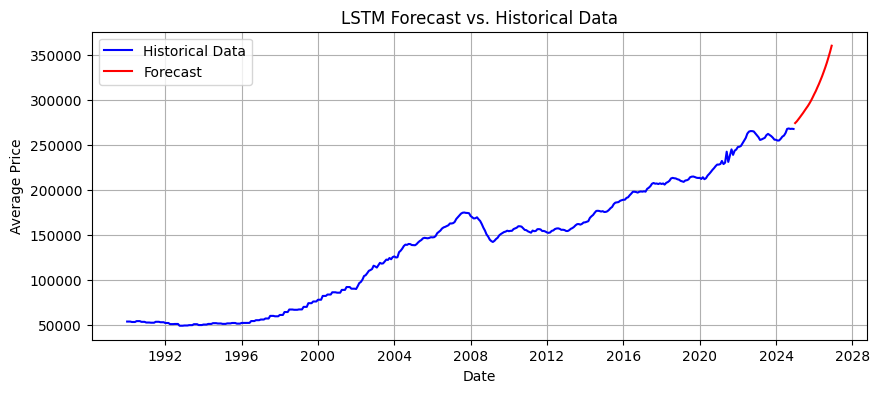

In [ ]:
# Display plot
plt.figure(figsize=(10, 4))
plt.plot(uk_data['AveragePrice'], label='Historical Data', color='blue')
plt.plot(forecast_data, label='Forecast', color='red')
plt.title('LSTM Forecast in Two years vs. Historical Data')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
